In [45]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pyia import GaiaData
from gala.mpl_style import hesperia, laguna

In [2]:
g = GaiaData("/Users/apricewhelan/data/GaiaDR2/rv-good-plx.fits")

In [8]:
gal = g.get_skycoord().galactic

In [17]:
z_mask = np.abs(gal.cartesian.z) < 500*u.pc
gal_zmask = gal[z_mask]

In [ ]:
# X = _gal.cartesian.xyz.to_value(u.pc)
# V = _gal.velocity.d_xyz.to_value(u.km/u.s)

In [42]:
def make_wedge_animation(gal, x_bins, v_bins, 
                         myspace=None, R_lim=None, 
                         wedge_size=20*u.deg, wedge_step=5*u.deg,
                         x_unit=u.pc, v_unit=u.km/u.s):
    
    # heliocentric Galactic position/velocity:
    X = gal.cartesian.xyz.to_value(x_unit)
    V = gal.velocity.d_xyz.to_value(v_unit)
    
    cyl = gal.represent_as('cylindrical')
    R = cyl.rho.to_value(x_unit)
    phi = cyl.phi.to_value(u.deg)
    
    x_bins = x_bins.to_value(x_unit)
    v_bins = v_bins.to_value(v_unit)
        
    # set up figure and axes:
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # prepare to select wedges:
    wedgie_edgies = np.arange(0, 360, 
                              wedge_step.to_value(u.deg))
    wedge_l = wedgie_edgies
    wedge_r = wedge_l + wedge_size.to_value(u.deg)
        
    # setup background "image" in xy panel
    H, xe, ye = np.histogram2d(X[0], X[1], bins=x_bins)
    axes[0, 0].pcolormesh(xe, ye, H.T, cmap='Greys',
                          norm=mpl.colors.LogNorm())
    
    # setup overlay image in xypanel
    wedge_mesh = axes[0, 0].pcolormesh(
        xe, ye, H.T, cmap='hesperia',
        norm=mpl.colors.LogNorm())    
    wedge_mesh.set_array(np.full_like(H.T, np.nan).ravel())
    
    if R_lim is not None:
        R_mask = ((R > R_lim[0].to_value(x_unit)) & 
                  (R <= R_lim[1].to_value(x_unit)))
    
    for phi_l, phi_r in zip(wedge_l, wedge_r):
        if phi_r <= 360:
            mask = (phi > phi_l) & (phi <= phi_r)
        else:
            mask = (phi > phi_l) & ((phi+360) <= phi_r)
            
        if R_lim is not None:
            mask &= R_mask
        
        H, xe, ye = np.histogram2d(X[0, mask], X[1, mask], bins=x_bins)
        wedge_mesh.set_array(H.T.ravel())
        break

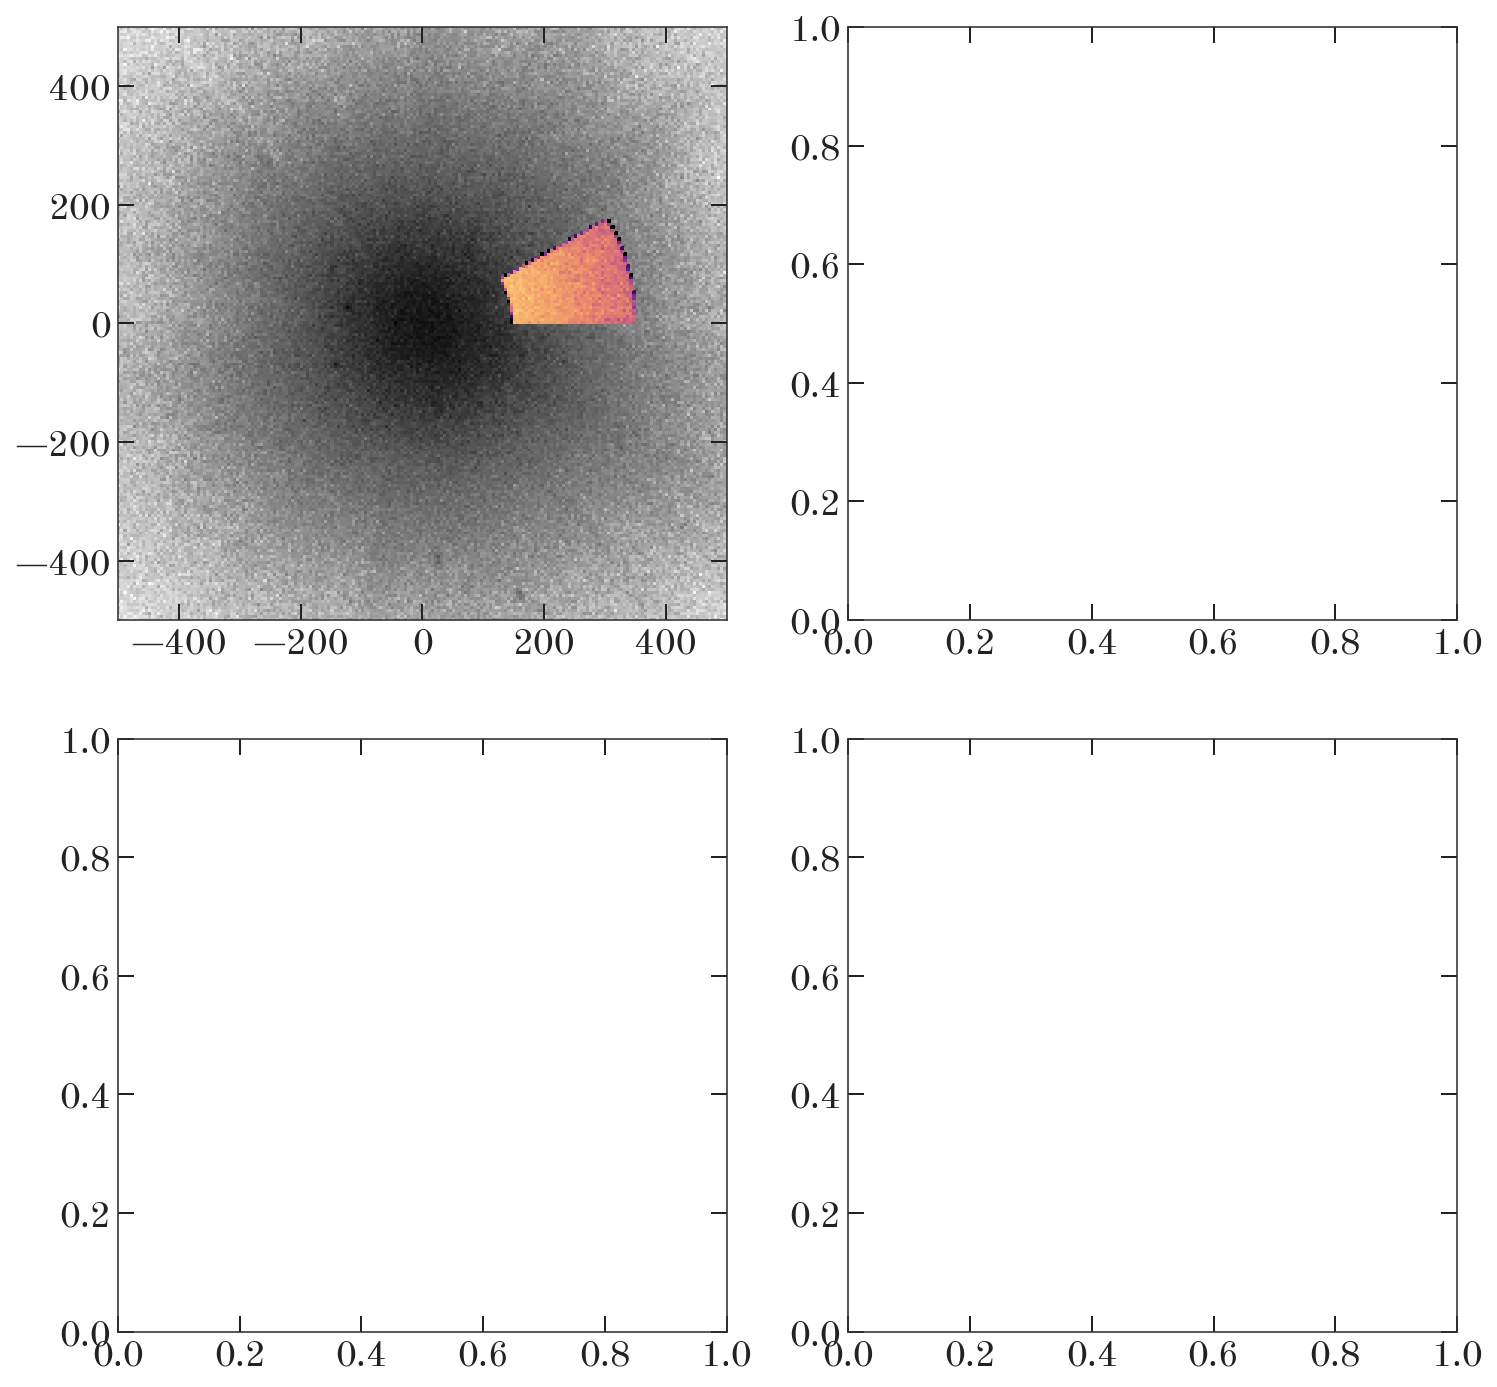

In [44]:
_ = make_wedge_animation(
    gal_zmask, R_lim=(150, 350)*u.pc,
    wedge_size=30*u.deg,
    x_bins=np.arange(-500, 500+1e-3, 5)*u.pc,
    v_bins=np.arange(-150, 150+1e-3, 2)*u.km/u.s)